In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools
import os
from scipy import stats
from scipy import constants
from scipy.integrate import odeint
from scipy.optimize import curve_fit


In [118]:
from tensorflow.keras import layers
import tensorflow.keras.callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

In [111]:

import keras
from keras.layers import  Input, Flatten, Dense, Lambda, Reshape
from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [94]:
dataset = 'Final_LHS_100_5000.csv'
#path_dataset = 'example-stress-strain-curve.csv'
df_stress= pd.read_csv(dataset,index_col=False)
NUM_DATAPOINTS, NUM_VARS  = 5000,2

In [74]:
df_stress.drop('Unnamed: 0',axis=1)

,h,T,M,Lambda_lhs,s
0,-1823.264575,1.073649e+06,366000,0.000000e+00,0.000018
1,-16179.533080,1.427669e+07,365000,-1.000000e-07,0.000242
2,-25519.968090,3.688392e+07,365000,-1.000000e-07,0.000625
3,-16290.401890,8.145517e+06,367000,2.000000e-07,0.000138
4,-7512.268957,2.946106e+07,368000,5.000000e-07,0.000500
...,...,...,...,...,...
4995,-24612.667210,1.584058e+07,1460000,1.910000e-04,0.000459
4996,-29893.433730,4.782813e+05,1460000,1.910000e-04,0.000199
4997,-19765.402220,1.470620e+07,1460000,1.910000e-04,0.000440
4998,-10927.531420,3.345389e+07,1460000,1.910000e-04,0.000758


In [75]:
h_aug=df_stress['h']

In [76]:
data=df_stress.drop(['M','Lambda_lhs','s'],axis=1)

In [77]:
input_hT=data.drop('Unnamed: 0',axis=1)

In [78]:
targets=df_stress['Lambda_lhs']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(input_hT, targets, test_size=0.3)

In [109]:
X_train.to_numpy()

array([[-1.03847674e+04,  2.08758391e+07],
       [-1.54382506e+04,  4.07189605e+07],
       [-1.99235923e+04,  1.57590173e+07],
       ...,
       [-2.96504297e+04,  3.89426430e+07],
       [-1.40448542e+04,  2.83100402e+07],
       [-1.03246638e+04,  2.70742333e+07]])

In [137]:
df=pd.read_csv('Final_LHS_100_5000.csv',index_col=False)
dataset = df.values
X = dataset[:,1:3]
dataset_Y=df['Lambda_lhs']
Y=dataset_Y.values
X.shape
min_max_scaler =MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [138]:
df

,Unnamed: 0,h,T,M,Lambda_lhs,s
0,0,-1823.264575,1.073649e+06,366000,0.000000e+00,0.000018
1,1,-16179.533080,1.427669e+07,365000,-1.000000e-07,0.000242
2,2,-25519.968090,3.688392e+07,365000,-1.000000e-07,0.000625
3,3,-16290.401890,8.145517e+06,367000,2.000000e-07,0.000138
4,4,-7512.268957,2.946106e+07,368000,5.000000e-07,0.000500
...,...,...,...,...,...,...
4995,4995,-24612.667210,1.584058e+07,1460000,1.910000e-04,0.000459
4996,4996,-29893.433730,4.782813e+05,1460000,1.910000e-04,0.000199
4997,4997,-19765.402220,1.470620e+07,1460000,1.910000e-04,0.000440
4998,4998,-10927.531420,3.345389e+07,1460000,1.910000e-04,0.000758


In [146]:
model = keras.Sequential()
model.add(layers.Dense(64, input_dim=2, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='linear', name='class'))
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=3, epochs=20, validation_data=(X_val, Y_val))



model.evaluate(X_test, Y_test)[1]
y_pred = model.predict(X_test)


Train on 3500 samples, validate on 750 samples
Epoch 1/20
3393/3500 [============================>.] - ETA: 0s - loss: 2.4848e-04 - accuracy: 2.9472e-04

C:\Users\rahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3500/3500 [==============================] - 2s 598us/sample - loss: 2.4090e-04 - accuracy: 2.8571e-04 - val_loss: 2.7762e-07 - val_accuracy: 0.0000e+00
Epoch 2/20
3500/3500 [==============================] - 2s 504us/sample - loss: 4.1066e-07 - accuracy: 2.8571e-04 - val_loss: 7.2642e-08 - val_accuracy: 0.0000e+00
Epoch 3/20
3500/3500 [==============================] - 2s 499us/sample - loss: 4.2803e-08 - accuracy: 2.8571e-04 - val_loss: 4.4478e-09 - val_accuracy: 0.0000e+00
Epoch 4/20
3500/3500 [==============================] - 2s 512us/sample - loss: 7.2220e-09 - accuracy: 2.8571e-04 - val_loss: 4.0496e-09 - val_accuracy: 0.0000e+00
Epoch 5/20
3500/3500 [==============================] - 2s 503us/sample - loss: 3.3364e-09 - accuracy: 2.8571e-04 - val_loss: 2.5492e-09 - val_accuracy: 0.0000e+00
Epoch 6/20
3500/3500 [==============================] - 2s 497us/sample - loss: 3.1431e-09 - accuracy: 2.8571e-04 - val_loss: 2.8607e-09 - val_accuracy: 0.0000e+00
Epoch 7/20
3500/3500 [=====

C:\Users\rahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [222]:
model.summary()

Model: "sequential_221"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_669 (Dense)           (None, 64)                192       
                                                                 
 dense_670 (Dense)           (None, 32)                2080      
                                                                 
 dropout_221 (Dropout)       (None, 32)                0         
                                                                 
 class (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


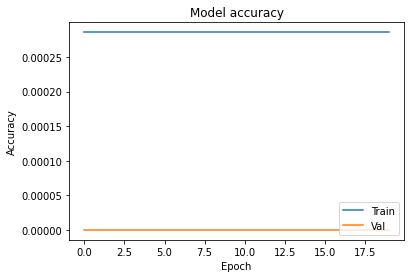

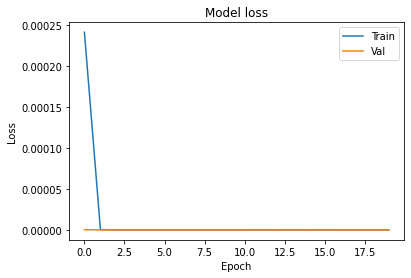

In [147]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [140]:
loss=model.history.history

In [142]:
loss.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

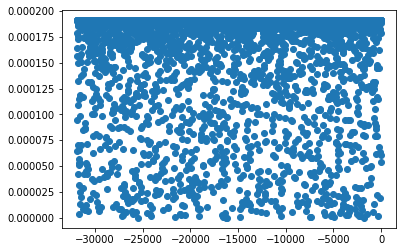

In [134]:
plt.scatter(df['h'],df['Lambda_lhs'])

In [214]:
df_uniform=pd.read_csv('Samples_generated_Uniform_100_5000.csv',index_col=False)
dataset_uni = df_uniform.values
lambda_100=dataset_uni[1:100,4]
X_uni = dataset_uni[1:100,1:3]
dataset_Y_uni=df_uniform['lambda']
X_uni_data=pd.DataFrame(X_uni, columns=['h', 'T'])
Y_uni=dataset_Y_uni.values
X_uni.shape
min_max_scaler =MinMaxScaler()
X_scale_uni= min_max_scaler.fit_transform(X_uni)


In [219]:
lambda_100

array([5.300e-05, 1.097e-04, 1.505e-04, 1.729e-04, 1.834e-04, 1.878e-04,
       1.897e-04, 1.902e-04, 1.907e-04, 1.908e-04, 1.909e-04, 1.908e-04,
       1.908e-04, 1.908e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.908e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04,
       1.909e-04, 1.909e-04, 1.909e-04, 1.909e-04, 

In [210]:
lambda_100_test=pd.DataFrame(lambda_100,columns=['lambda_0']   )    

In [201]:
y_pred_uni = model.predict(X_scale_uni)


In [218]:
y_pred_uni

array([[0.00036359],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.00024104],
       [0.000

6.086496355281803e-05

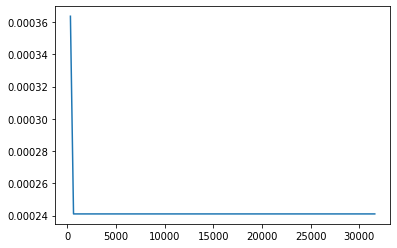

In [220]:
plt.plot(X_uni_data['h'],y_pred_uni)
np.sqrt(mean_squared_error(lambda_100,y_pred_uni))

In [ ]:
M1 = Input(shape=(num_features,),name='M1')
M2 = Dense(400, activation='relu',name='M2')(M1)
M3 = Dense(1, activation='sigmoid',name='M3')(M2)

C2 = Dense(40, activation='relu',name='C2')(M1)
C3 = Dense(1, activation='sigmoid',name='C3')(C2)


#O = Concatenate(axis=-1)([M3, C3])
merged = Model(inputs=[M1],outputs=[M3, C3])
plot_model(merged,to_file='architecture4.png',show_shapes=True)
loss1 = 'binary_crossentropy'
loss2 = 'binary_crossentropy'

merged.compile(optimizer='adam',loss=[loss1, loss2],loss_weights=[alpham, 1 - alpham], metrics=['accuracy'])
history = merged.fit(X_train, [y_train,y_train] ,batch_size=16, epochs=100)
score = merged.evaluate(X_test, [y_test,y_test], batch_size=16)